In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) 
%matplotlib inline 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

import math


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## Problem 1

In [342]:
zirconia_df=pd.read_csv("cubic_zirconia.csv")
zirconia_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [343]:
zirconia_df.drop(["Unnamed: 0"],axis="columns",inplace=True)

In [344]:
zirconia_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [345]:
zirconia_df.shape

(26967, 10)

In [346]:
zirconia_df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [347]:
zirconia_df.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [348]:
10816/len(zirconia_df)

0.40108280490970444

In [349]:
zirconia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


Depth column has null values

Outliers: No tails oberseved in the denisty plots

Depth column seems to have no linear relationship with other attributes. 

In [350]:
zirconia_df[zirconia_df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


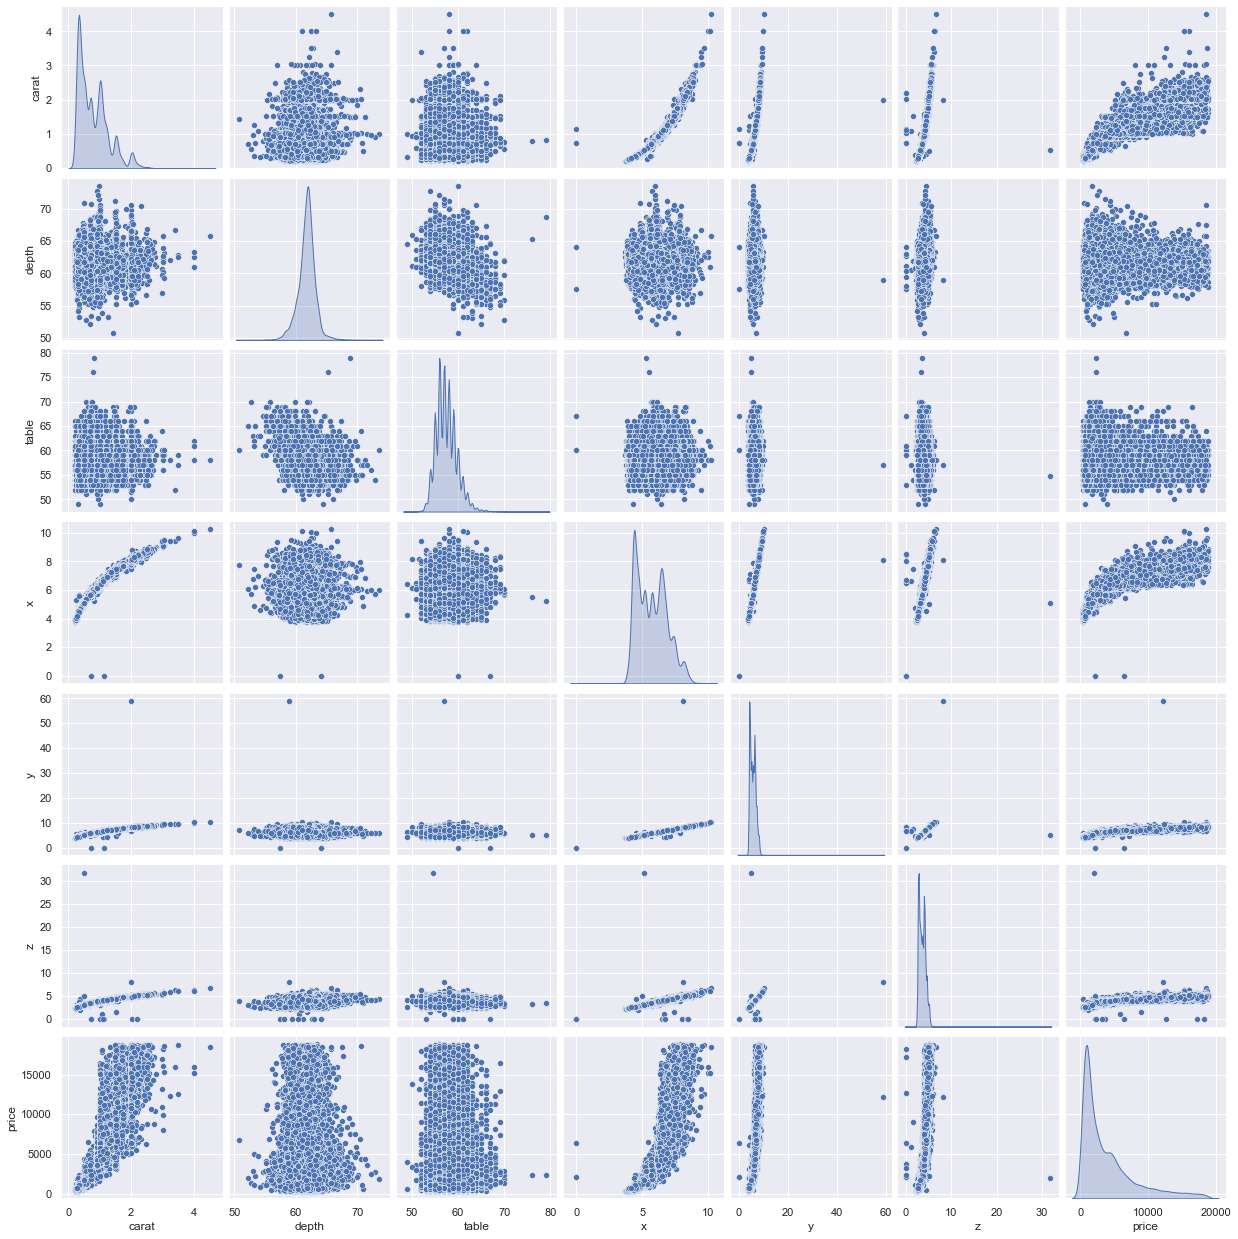

In [351]:
sns.pairplot(zirconia_df, diag_kind='kde')   # to plot density curve instead of histogram

<AxesSubplot:>

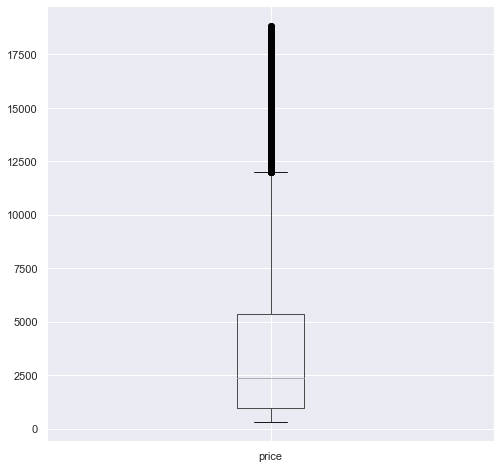

In [352]:
zirconia_df.boxplot(column="price",return_type='axes',figsize=(8,8))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


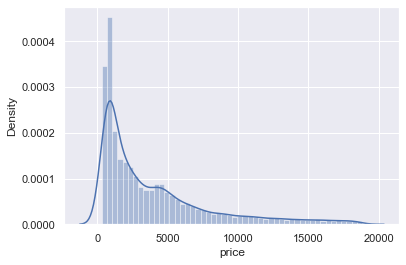

In [353]:
sns.distplot(zirconia_df['price']);

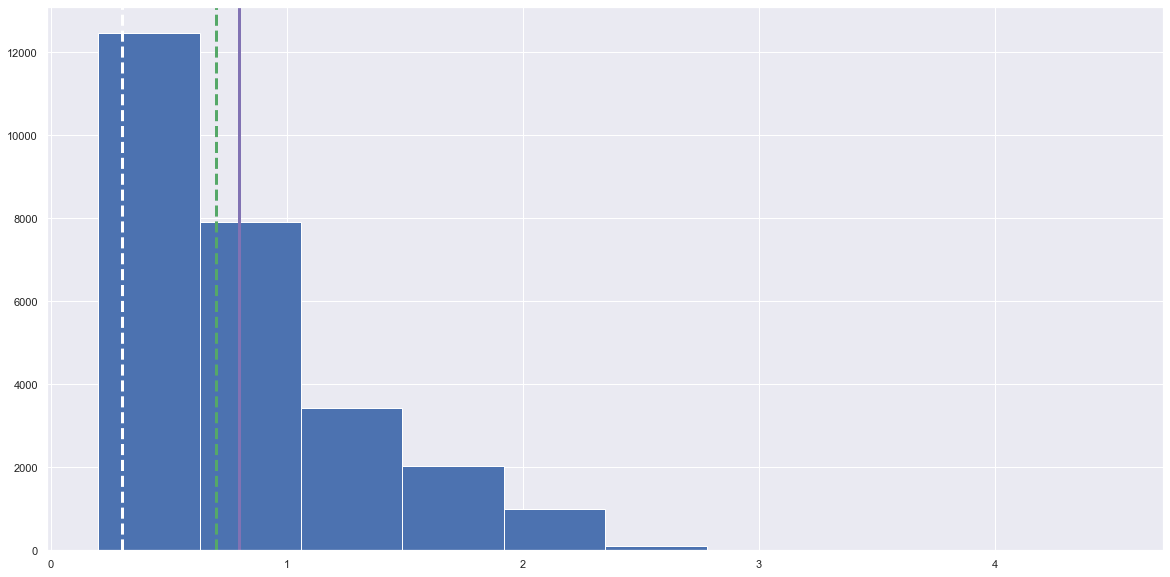

In [246]:
data=zirconia_df['carat']

plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data, color='b') # plots a simple histogram
plt.axvline(data.mean(), color='m', linewidth=3)
plt.axvline(data.median(), color='g', linestyle='dashed', linewidth=3)
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=3)

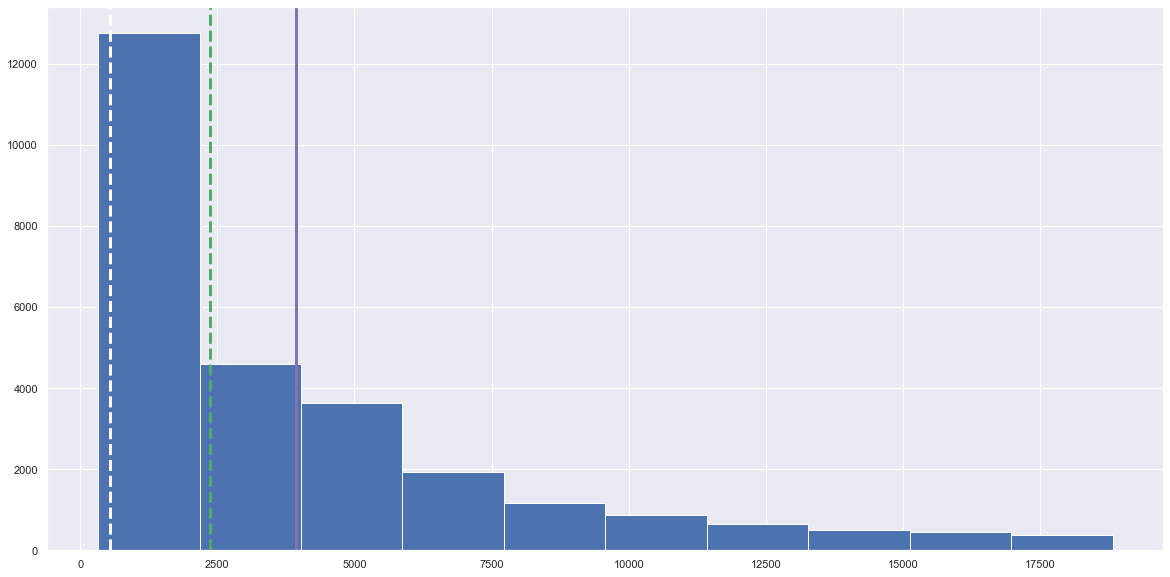

In [247]:
data=zirconia_df['price']

plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data, color='b') # plots a simple histogram
plt.axvline(data.mean(), color='m', linewidth=3)
plt.axvline(data.median(), color='g', linestyle='dashed', linewidth=3)
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=3)

<font color=darkblue>

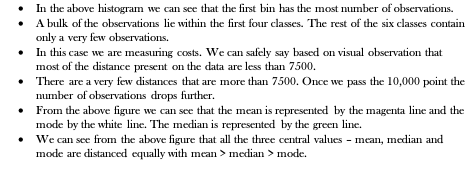

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

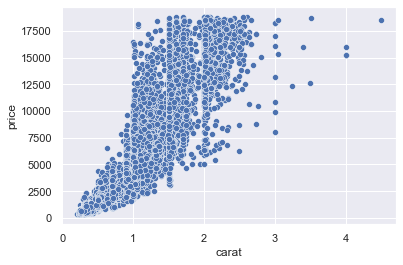

In [248]:
sns.scatterplot(zirconia_df['carat'], zirconia_df['price'], palette='Set2') 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

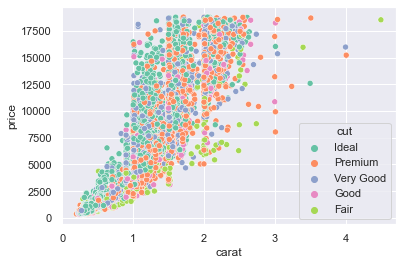

In [249]:
sns.scatterplot(zirconia_df['carat'], zirconia_df['price'], hue=zirconia_df['cut'],palette='Set2') 

<AxesSubplot:>

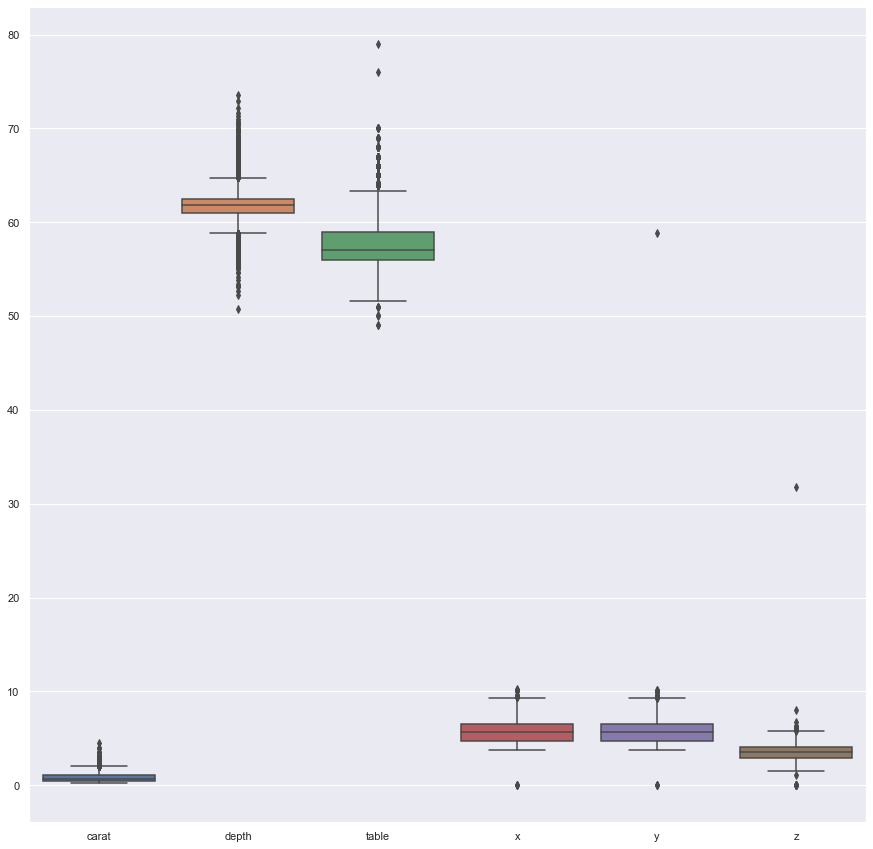

In [250]:
plt.figure(figsize=(15,15))
sns.boxplot(data=zirconia_df[zirconia_df.columns[:9]])

<AxesSubplot:>

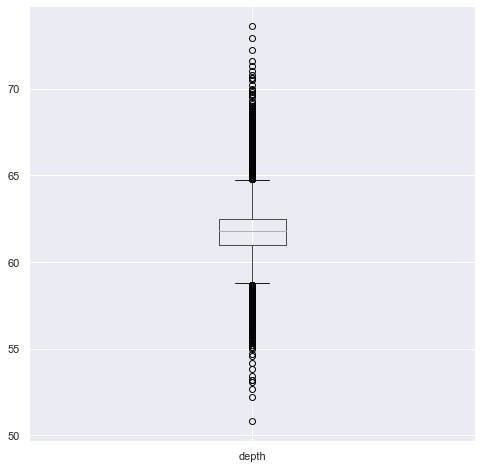

In [251]:
zirconia_df.boxplot(column="depth",return_type='axes',figsize=(8,8))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

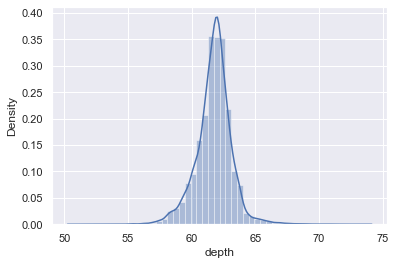

In [252]:
sns.distplot(zirconia_df['depth']) # plots a frequency polygon superimposed on a histogram using the seaborn package.

In [253]:
print(zirconia_df['depth'].mean())
print(zirconia_df['depth'].median())
print(zirconia_df['depth'].mode())

61.745146555006194
61.8
0    62.0
dtype: float64


## Filling null values - depth column

In [354]:
zirconia_df.fillna(zirconia_df.mean(),inplace=True)
zirconia_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Searching 0s in x,y and z and dropping them

In [355]:
 zirconia_df[zirconia_df['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [356]:
zirconia_df=zirconia_df[zirconia_df.x!=0]
len(zirconia_df)

26964

## Applying OneHotEncoder

In [357]:
print('cut:',zirconia_df['cut'].unique())
print('color:',zirconia_df['color'].unique())
print('clarity:',zirconia_df['clarity'].unique())

cut: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color: ['E' 'G' 'F' 'D' 'H' 'J' 'I']
clarity: ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


In [358]:
zirconia_df1 = pd.get_dummies(zirconia_df, columns=['cut','color','clarity'])
zirconia_df1

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [359]:
zirconia_df1.shape

(26964, 27)

## Splitting the data -1

In [360]:
x1 = zirconia_df1.drop('price', axis=1)
y1 = zirconia_df1[['price']]

In [361]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.30 , random_state=1)

In [362]:
regression_model = LinearRegression()
regression_model.fit(x_train1, y_train1)

LinearRegression()

In [363]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11650.03355640233
The coefficient for depth is -72.96352369082007
The coefficient for table is -32.62450078199602
The coefficient for x is -1134.1175279872343
The coefficient for y is -8.581304623725442
The coefficient for z is -59.65623671868303
The coefficient for cut_Fair is -503.85559097756067
The coefficient for cut_Good is -22.18468485190656
The coefficient for cut_Ideal is 235.038807320849
The coefficient for cut_Premium is 163.65136488705295
The coefficient for cut_Very Good is 127.35010362156848
The coefficient for color_D is 840.4014393392296
The coefficient for color_E is 635.5528128525855
The coefficient for color_F is 557.3039771971256
The coefficient for color_G is 356.5086116322347
The coefficient for color_H is -139.5569541656623
The coefficient for color_I is -680.4016731498654
The coefficient for color_J is -1569.8082137056495
The coefficient for clarity_I1 is -3703.6882240082573
The coefficient for clarity_IF is 1477.745213316331
The coef

In [364]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7247.94449570293


In [365]:
regression_model.score(x_train1, y_train1)

0.9219173554735869

In [366]:
train_predict1=regression_model.predict(x_train1)

In [367]:
mse=mean_squared_error(y_train1,train_predict1)
mse

1271635.697814406

In [368]:
math.sqrt(mse)

1127.6682569862494

In [369]:
regression_model.score(x_test1, y_test1)

0.9199942807298161

In [370]:
test_predict1 = regression_model.predict(x_test1)
mse=mean_squared_error(y_test1,test_predict1)

In [371]:
math.sqrt(mse)

1131.431127925878

## Statistical Model

In [372]:
data_train1 = pd.concat([x_train1, y_train1], axis=1)
data_train1.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
1936,0.33,61.800000,62.0,4.40,4.45,2.74,0,1,0,0,...,0,0,0,1,0,0,0,0,0,536
11484,0.42,61.700000,54.0,4.83,4.86,2.99,0,0,1,0,...,1,0,0,0,0,0,0,0,1,673
12297,1.00,63.200000,56.0,6.42,6.37,4.04,0,0,0,0,...,0,0,0,0,0,0,0,0,1,8467
2786,1.11,61.745147,56.0,6.62,6.54,4.18,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4834
9402,1.01,57.900000,57.0,6.53,6.57,3.79,1,0,0,0,...,0,0,0,1,0,0,0,0,0,5144


In [373]:
string=""
for col in data_train1.columns:
    string=string+"+"+col
print(string)

data_train1.rename(columns = {'cut_Very Good': 'cut_Very_Good'}, inplace = True)

+carat+depth+table+x+y+z+cut_Fair+cut_Good+cut_Ideal+cut_Premium+cut_Very Good+color_D+color_E+color_F+color_G+color_H+color_I+color_J+clarity_I1+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+price


In [374]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+depth+table+x+y+z+cut_Fair+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_D+color_E+color_F+color_G+color_H+color_I+color_J+clarity_I1+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+price', data = data_train1).fit()
lm1.params

Intercept        6.252776e-12
carat           -1.682565e-11
depth            4.085621e-14
table           -1.030287e-13
x                1.705303e-12
y                3.694822e-13
z               -2.557954e-13
cut_Fair         1.477929e-12
cut_Good        -5.400125e-13
cut_Ideal        3.694822e-13
cut_Premium      5.400125e-13
cut_Very_Good    6.536993e-13
color_D         -1.080025e-12
color_E         -8.526513e-13
color_F         -9.805490e-13
color_G          3.979039e-13
color_H          2.842171e-13
color_I          7.958079e-13
color_J          2.088996e-12
clarity_I1       1.364242e-12
clarity_IF       5.684342e-14
clarity_SI1      7.389644e-13
clarity_SI2      1.705303e-13
clarity_VS1      2.273737e-13
clarity_VS2      1.136868e-13
clarity_VVS1    -8.011369e-13
clarity_VVS2    -4.831691e-13
price            1.000000e+00
dtype: float64

In [375]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.330e+32
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:28:01   Log-Likelihood:             4.6474e+05
No. Observations:               18874   AIC:                        -9.294e+05
Df Residuals:                   18849   BIC:                        -9.292e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.253e-12   1.98e-12      3.157

In [376]:
lm1 = smf.ols(formula= 'price ~ carat+table+x+y+cut_Fair+color_D+color_E+color_F+color_I+color_J+clarity_I1+clarity_SI1+clarity_VVS1+clarity_VVS2+price', data = data_train1).fit()
lm1.params

Intercept      -2.273737e-13
carat           2.273737e-13
table          -3.907985e-14
x               8.526513e-13
y               4.547474e-13
cut_Fair        2.557954e-13
color_D        -6.075140e-13
color_E        -5.613288e-13
color_F        -2.771117e-13
color_I        -1.818989e-12
color_J        -2.884804e-12
clarity_I1     -3.751666e-12
clarity_SI1     2.131628e-13
clarity_VVS1    1.989520e-13
clarity_VVS2    1.065814e-13
price           1.000000e+00
dtype: float64

In [377]:
x2=x1[['carat','table','x','y','cut_Fair','color_D','color_E','color_F','color_I','color_J','clarity_I1','clarity_SI1','clarity_VVS1','clarity_VVS2']]

In [378]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y1, test_size=0.30 , random_state=1)


In [379]:
regression_model = LinearRegression()
regression_model.fit(x_train2, y_train2)

LinearRegression()

In [380]:
regression_model.score(x_train2, y_train2)

0.8954548078103828

In [381]:
train_predict2=regression_model.predict(x_train2)

In [383]:
mse=mean_squared_error(y_train2,train_predict2)
math.sqrt(mse)

1304.836604228096

In [385]:
regression_model.score(x_test2, y_test2)

0.8936069089320424

In [386]:
test_predict2=regression_model.predict(x_test2)

In [387]:
mse=mean_squared_error(y_test2,test_predict2)
math.sqrt(mse)

1304.741028404581

## Applying LabelEncoder

In [286]:
from sklearn.preprocessing import LabelEncoder 

encoded_zirconia_df=zirconia_df.copy()
labelencoder=LabelEncoder()
col_for_encoded=['cut','color','clarity']

for col in col_for_encoded:
    encoded_zirconia_df.loc[:, [col]]=labelencoder.fit_transform(encoded_zirconia_df.loc[:, [col]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [183]:
encoded_zirconia_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [125]:
encoded_zirconia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.1 MB


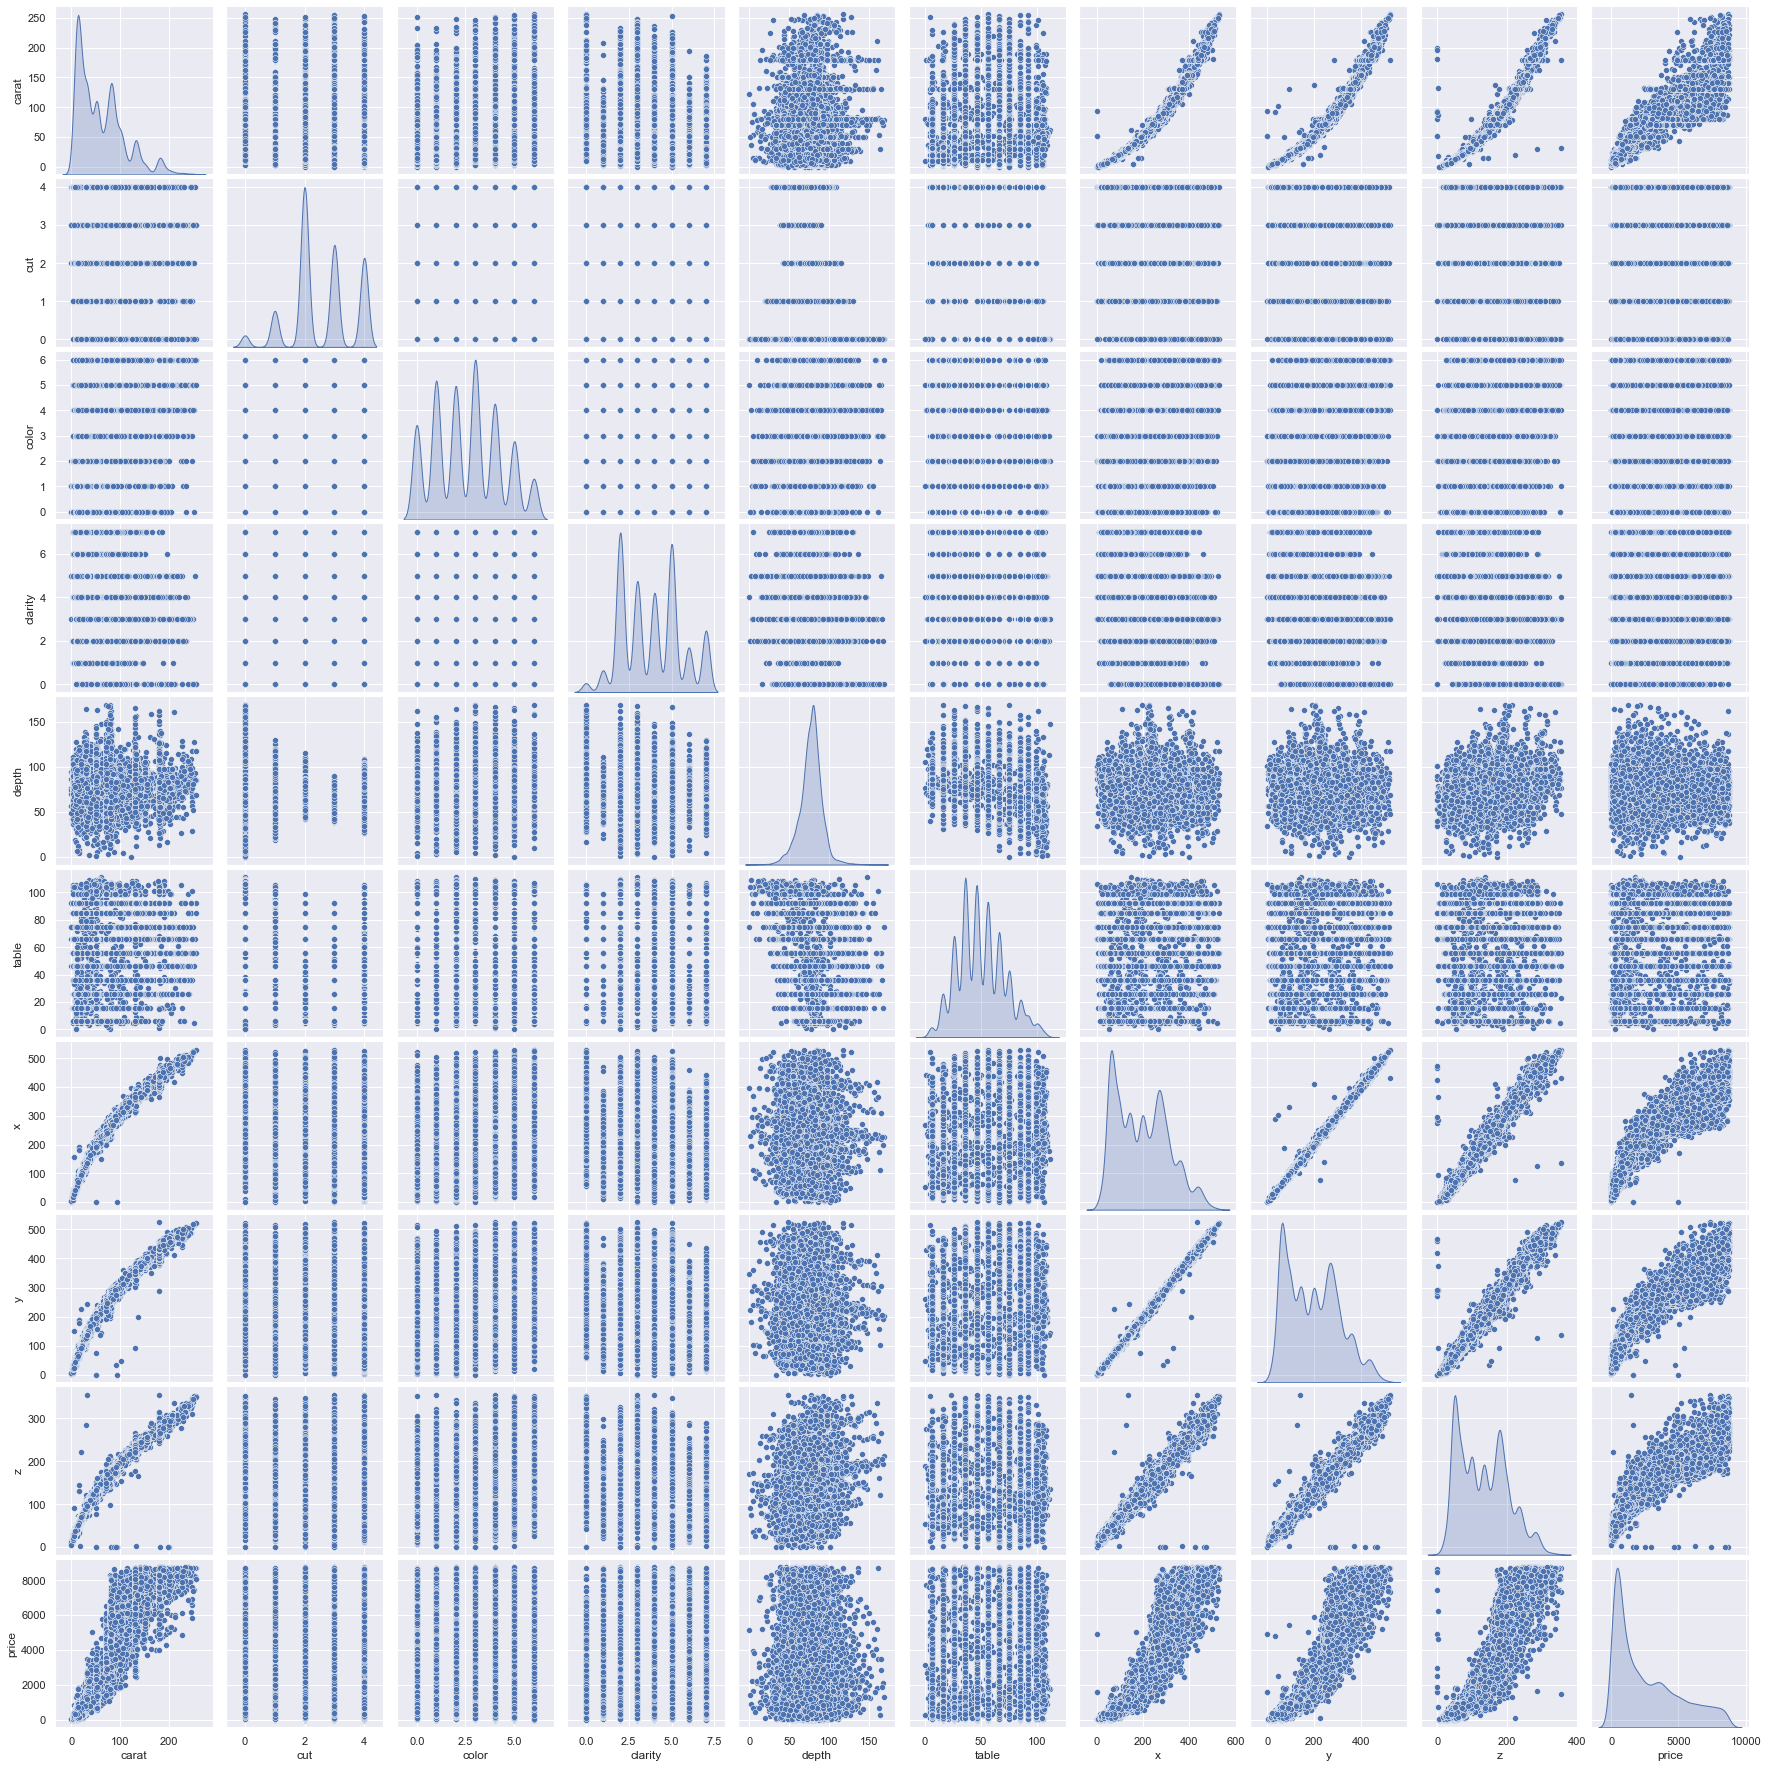

In [90]:
sns.pairplot(encoded_zirconia_df, diag_kind='kde')   # to plot density curve instead of histogram

In [126]:
x = encoded_zirconia_df.drop('price', axis=1)
y = encoded_zirconia_df[['price']]

In [127]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65


In [128]:
y.head()

,price
0,499
1,984
2,6289
3,1082
4,779


In [129]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)


In [130]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [131]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 10920.24958617361
The coefficient for cut is 54.90879898363708
The coefficient for color is -272.1947491093345
The coefficient for clarity is 290.25088896945704
The coefficient for depth is -152.0231484492962
The coefficient for table is -96.95150052806709
The coefficient for x is -1092.5575383044218
The coefficient for y is 1.340179820742299
The coefficient for z is -31.59553926337982


In [132]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 16009.192198928107


In [133]:
regression_model.score(x_train, y_train)

0.886909816657385

In [134]:
train_predict=regression_model.predict(x_train)

In [135]:
from sklearn.metrics import mean_squared_error
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_train,train_predict)

1829172.8352187457

In [136]:
regression_model.score(x_test, y_test)

0.8876904533737259

In [137]:
test_predict = regression_model.predict(x_test)


In [138]:
np.square(np.subtract(y_test,test_predict)).mean()

price    1.825706e+06
dtype: float64

In [139]:
mean_squared_error(y_test,test_predict)

1825706.1109915024

## Statistical Model

In [140]:
data_train = pd.concat([x_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,0.41,2,5,7,62.3,56.0,4.77,4.73,2.96,1061
9728,1.71,2,6,2,62.8,57.0,7.58,7.55,4.75,6320
1936,0.33,1,2,2,61.8,62.0,4.40,4.45,2.74,536
26220,0.70,4,4,2,62.8,57.0,5.61,5.66,3.54,2214
18445,0.70,2,0,3,62.1,56.0,5.67,5.71,3.53,2575


In [141]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    16009.192199
carat        10920.249586
cut             54.908799
color         -272.194749
clarity        290.250889
depth         -152.023148
table          -96.951501
x            -1092.557538
y                1.340180
z              -31.595539
dtype: float64

In [142]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 1.644e+04
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:06:56   Log-Likelihood:            -1.6287e+05
No. Observations:               18876   AIC:                         3.258e+05
Df Residuals:                   18866   BIC:                         3.258e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.601e+04    681.043     23.507      0.0

In [144]:
mse = np.mean((regression_model.predict(x_test)-y_test)**2)

In [145]:
import math

math.sqrt(mse)

1351.186926739415

In [146]:
regression_model.score(x_test, y_test)

0.8876904533737259

In [148]:
y_pred = regression_model.predict(x_test)

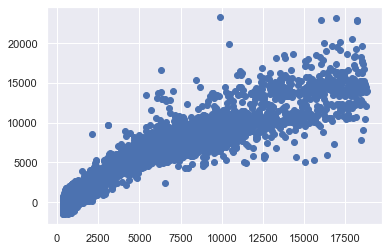

In [149]:

plt.scatter(y_test['price'], y_pred)

## Problem 2

In [2]:
holPack_df=pd.read_csv("Holiday_Package.csv")
holPack_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [3]:
holPack_df.drop(["Unnamed: 0"],axis="columns",inplace=True)

In [4]:
holPack_df.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


In [5]:
holPack_df.shape

(872, 7)

In [6]:
holPack_df.describe(include="all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [7]:
holPack_df.sort_values(by=['Salary'])

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
310,yes,1322,57,12,0,0,no
134,no,10551,22,13,1,0,no
775,no,10741,57,5,0,0,yes
551,no,12070,36,8,1,0,no
762,yes,12578,29,1,2,0,yes
806,yes,13993,49,6,0,3,yes
611,yes,14108,59,8,0,0,no
513,yes,14119,44,13,0,0,no
116,no,14395,56,7,0,1,no
79,yes,15462,54,8,0,0,no


In [8]:
holPack_df.drop(holPack_df[holPack_df['Salary']==1322].index,inplace=True)

In [9]:
656/872

0.7522935779816514

In [10]:
holPack_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     871 non-null object
Salary               871 non-null int64
age                  871 non-null int64
educ                 871 non-null int64
no_young_children    871 non-null int64
no_older_children    871 non-null int64
foreign              871 non-null object
dtypes: int64(5), object(2)
memory usage: 54.4+ KB


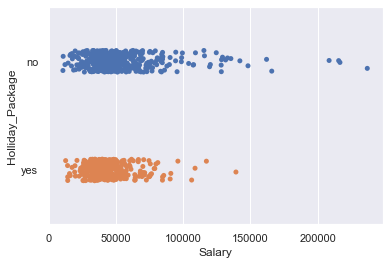

In [11]:
sns.stripplot(holPack_df['Salary'], holPack_df['Holliday_Package']) ### Concentration of observations

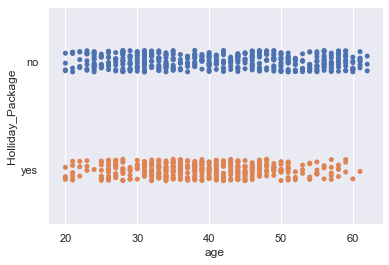

In [12]:
sns.stripplot(holPack_df['age'], holPack_df['Holliday_Package']) ### Concentration of observations

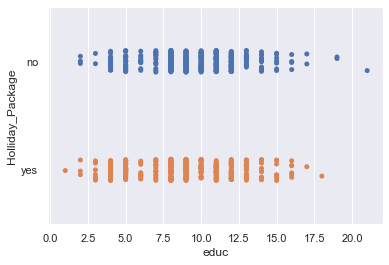

In [13]:
sns.stripplot(holPack_df['educ'], holPack_df['Holliday_Package']) ### Concentration of observations

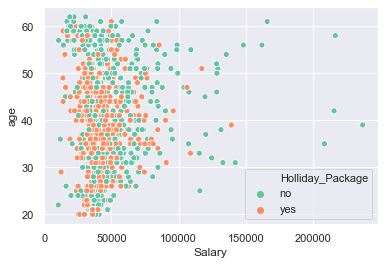

In [14]:
sns.scatterplot(holPack_df['Salary'], holPack_df['age'], hue=holPack_df['Holliday_Package'],palette='Set2') ;

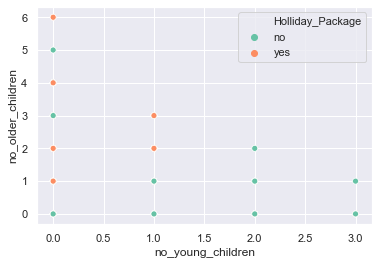

In [15]:
sns.scatterplot(holPack_df['no_young_children'], holPack_df['no_older_children'], hue=holPack_df['Holliday_Package'],palette='Set2') ;

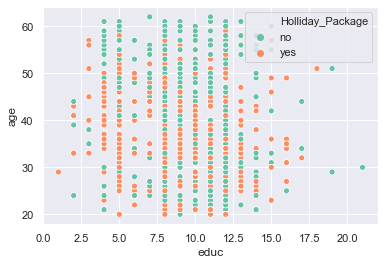

In [16]:
sns.scatterplot(holPack_df['educ'], holPack_df['age'], hue=holPack_df['Holliday_Package'],palette='Set2') ;

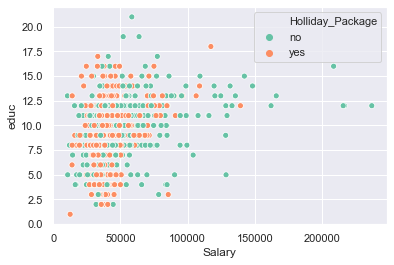

In [17]:
sns.scatterplot(holPack_df['Salary'], holPack_df['educ'], hue=holPack_df['Holliday_Package'],palette='Set2') ;

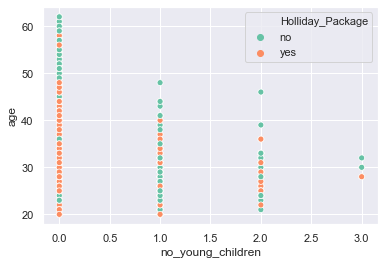

In [18]:
sns.scatterplot(holPack_df['no_young_children'], holPack_df['age'], hue=holPack_df['Holliday_Package'],palette='Set2') ;

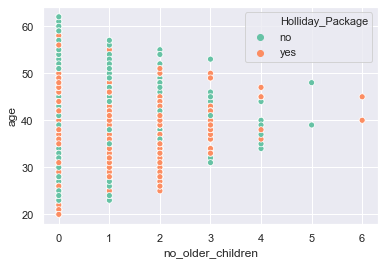

In [19]:
sns.scatterplot(holPack_df['no_older_children'], holPack_df['age'], hue=holPack_df['Holliday_Package'],palette='Set2') ;

In [20]:
holPack_df.iloc[:,0].value_counts()

no     471
yes    400
Name: Holliday_Package, dtype: int64

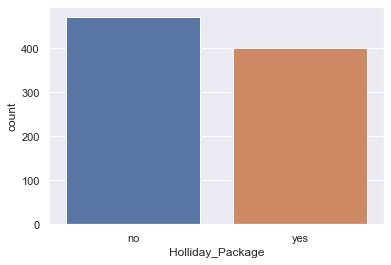

In [21]:
sns.countplot("Holliday_Package",data=holPack_df)

In [22]:
holPack_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [23]:
holPack_df['Holliday_Package'] = holPack_df['Holliday_Package'].replace({'yes': 1, 'no': 0})
holPack_df['foreign'] = holPack_df['foreign'].replace({'yes': 1, 'no': 0})
holPack_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


C:\Users\Tejo Vinay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Tejo Vinay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


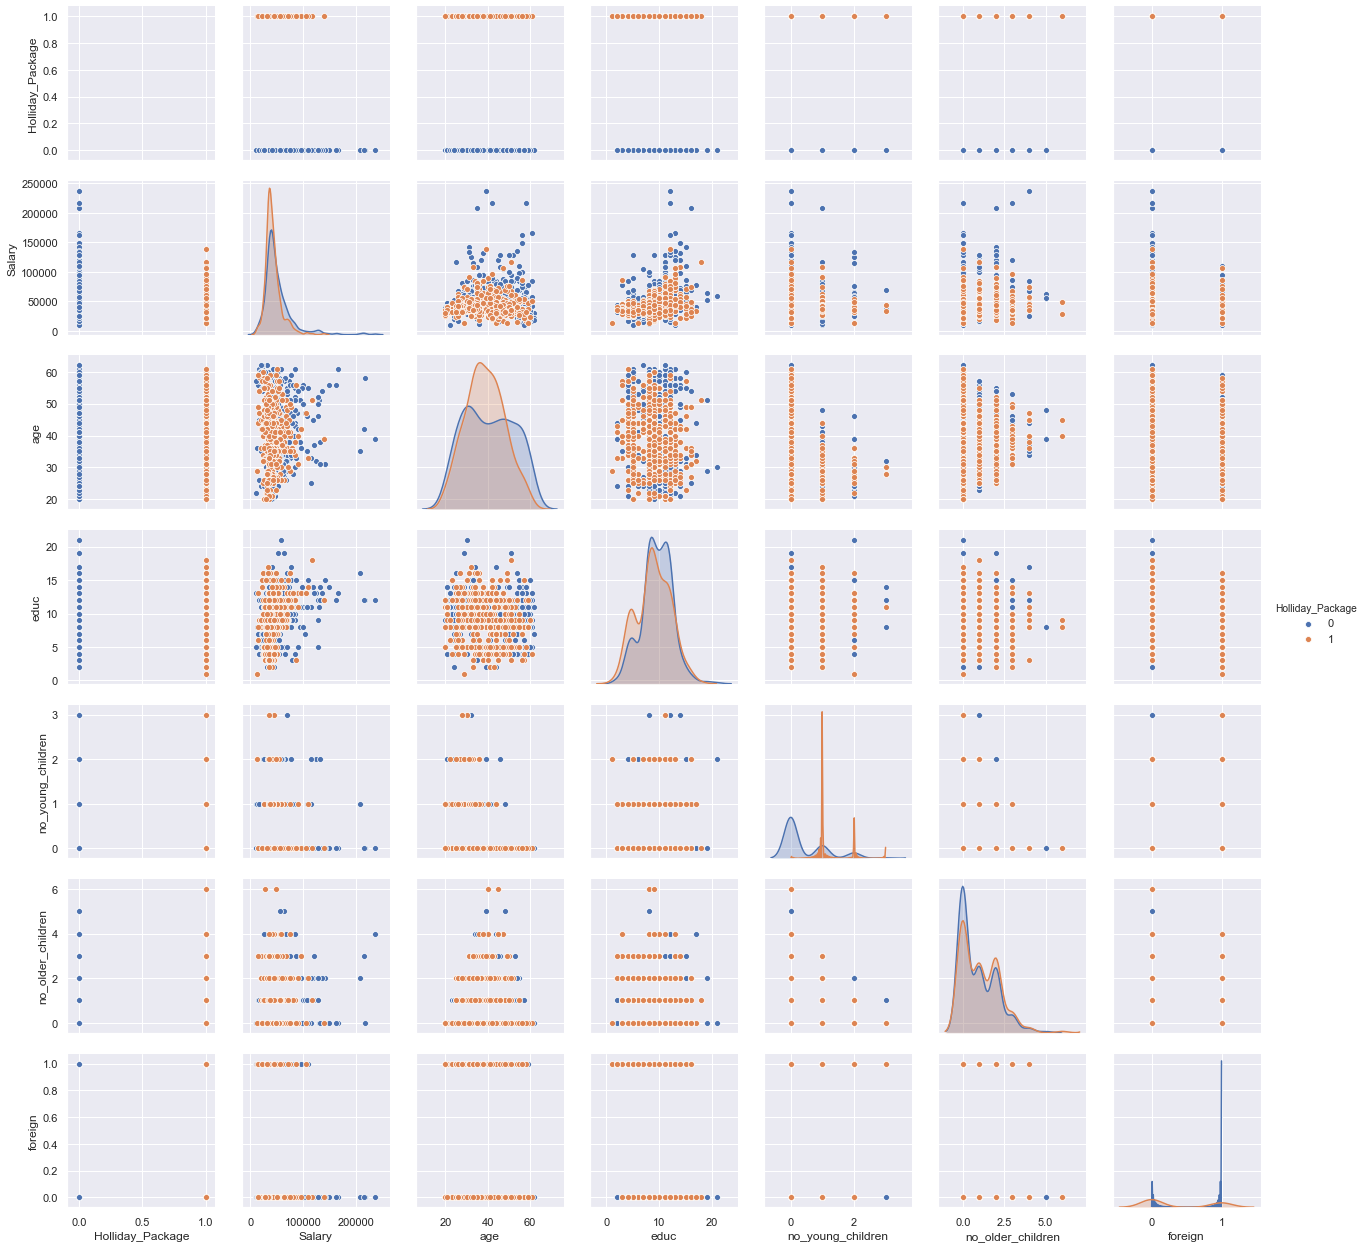

In [25]:
sns.pairplot(holPack_df,hue="Holliday_Package",diag_kind='kde');   # to plot density curve instead of histogram
#sns.pairplot(pima_df , hue='class' , diag_kind = 'kde')

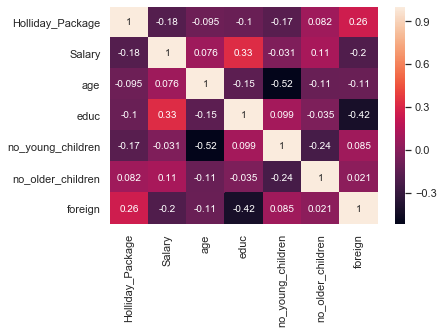

In [26]:
sns.heatmap(holPack_df.corr(), annot=True)

In [27]:
x = holPack_df.drop('Holliday_Package', axis=1)
y = holPack_df[['Holliday_Package']]

In [28]:
x.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [29]:
y.head()

,Holliday_Package
0,0
1,1
2,0
3,0
4,0


In [30]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=7)

Model Score: 0.5076335877862596
ROC AUC=0.631


C:\Users\Tejo Vinay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tejo Vinay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


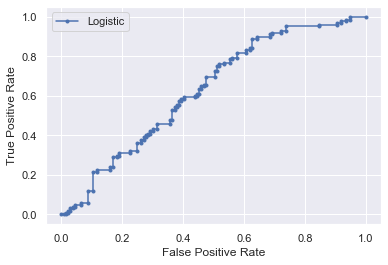

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train1, y_train1)
y_predict1 = model.predict(x_test1)
model_score = model.score(x_test1, y_test1)
print("Model Score:", model_score)
lr_probs = model.predict_proba(x_test1) #predict probabilities
lr_probs=lr_probs[:,1] #keep probabilities for the positive outcome only
lr_auc = roc_auc_score(y_test1, lr_probs)
print('ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test1, lr_probs) #calculate ROC Curve
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Model Score: 0.5320197044334976
ROC AUC=0.568


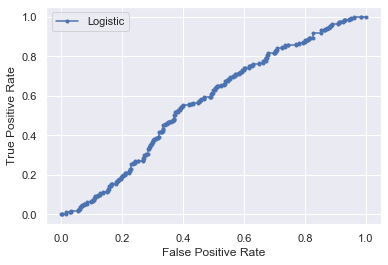

In [39]:
y_predict2 = model.predict(x_train1)
model_score = model.score(x_train1, y_train1)
print("Model Score:", model_score)
lr_probs2 = model.predict_proba(x_train1) #predict probabilities
lr_probs2=lr_probs2[:,1] #keep probabilities for the positive outcome only
lr_auc2 = roc_auc_score(y_train1, lr_probs2)
print('ROC AUC=%.3f' % (lr_auc2))
lr_fpr2, lr_tpr2, _ = roc_curve(y_train1, lr_probs2) #calculate ROC Curve
# plot the roc curve for the model
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_train1, y_predict2))

              precision    recall  f1-score   support

           0       0.54      0.94      0.69       334
           1       0.33      0.04      0.07       275

    accuracy                           0.53       609
   macro avg       0.44      0.49      0.38       609
weighted avg       0.45      0.53      0.41       609



In [34]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test1, y_predict1))
print(metrics.classification_report(y_test1, y_predict1))

[[126  11]
 [118   7]]
              precision    recall  f1-score   support

           0       0.52      0.92      0.66       137
           1       0.39      0.06      0.10       125

    accuracy                           0.51       262
   macro avg       0.45      0.49      0.38       262
weighted avg       0.46      0.51      0.39       262



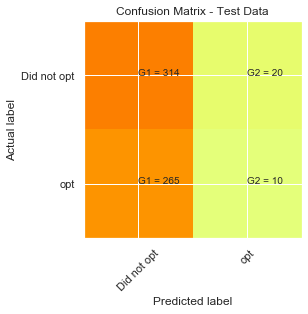

In [35]:
cm = metrics.confusion_matrix(y_train1, y_predict2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Did not opt', 'opt']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

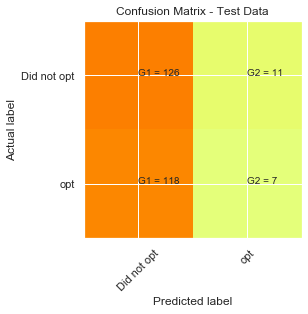

In [36]:
cm = metrics.confusion_matrix(y_test1, y_predict1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Did not opt', 'opt']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [211]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predict)

In [212]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_predict))

roc_auc_score for Logistic Regression:  0.5


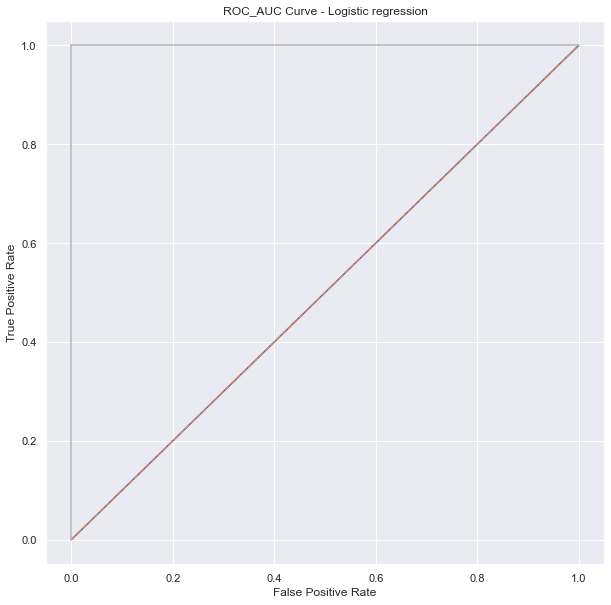

In [214]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC_AUC Curve - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [216]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,y_train)
model

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [217]:
# Predict it
y_predict = model.predict(x_test)

In [218]:
model_score = model.score(x_test, y_test)
print(model_score)

0.6603053435114504


In [219]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       138
           1       0.66      0.57      0.61       124

    accuracy                           0.66       262
   macro avg       0.66      0.66      0.66       262
weighted avg       0.66      0.66      0.66       262



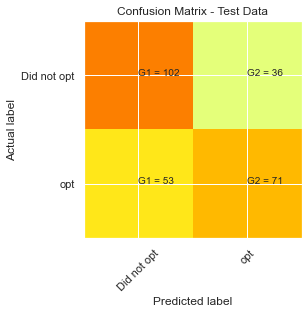

In [220]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Did not opt', 'opt']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()